In [1]:
import pandas as pd

In [15]:
airpassengers = pd.read_csv("airpassenger.csv",index_col='time',parse_dates=True)
airpassengers

,AirPassengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
from matplotlib.pylab import rcParams
plt.rcParams['figure.figsize']=(12,5)
plt.rcParams['axes.grid']=False
plt.rcParams['font.size']=10
plt.rcParams['font.style']='normal'

In [13]:
print(airpassengers.info())
print('')
print(airpassengers.describe().round(decimals=2))
print('')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-01-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AirPassengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

       AirPassengers
count         144.00
mean          280.30
std           119.97
min           104.00
25%           180.00
50%           265.50
75%           360.50
max           622.00



<function matplotlib.pyplot.show(close=None, block=None)>

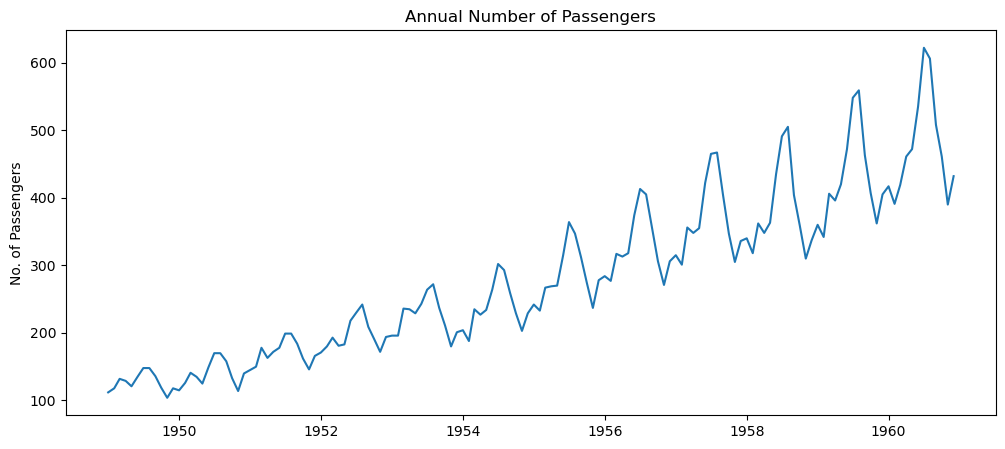

In [16]:
plt.plot(airpassengers)
plt.title("Annual Number of Passengers")
plt.ylabel("No. of Passengers")
plt.show

In [18]:
moving_avg=airpassengers.rolling(window=12).mean()
moving_std=airpassengers.rolling(window=12).std()
print(moving_avg)
print(moving_std)

            AirPassengers
time                     
1949-01-01            NaN
1949-02-01            NaN
1949-03-01            NaN
1949-04-01            NaN
1949-05-01            NaN
...                   ...
1960-08-01     463.333333
1960-09-01     467.083333
1960-10-01     471.583333
1960-11-01     473.916667
1960-12-01     476.166667

[144 rows x 1 columns]
            AirPassengers
time                     
1949-01-01            NaN
1949-02-01            NaN
1949-03-01            NaN
1949-04-01            NaN
1949-05-01            NaN
...                   ...
1960-08-01      83.630500
1960-09-01      84.617276
1960-10-01      82.541954
1960-11-01      79.502382
1960-12-01      77.737125

[144 rows x 1 columns]


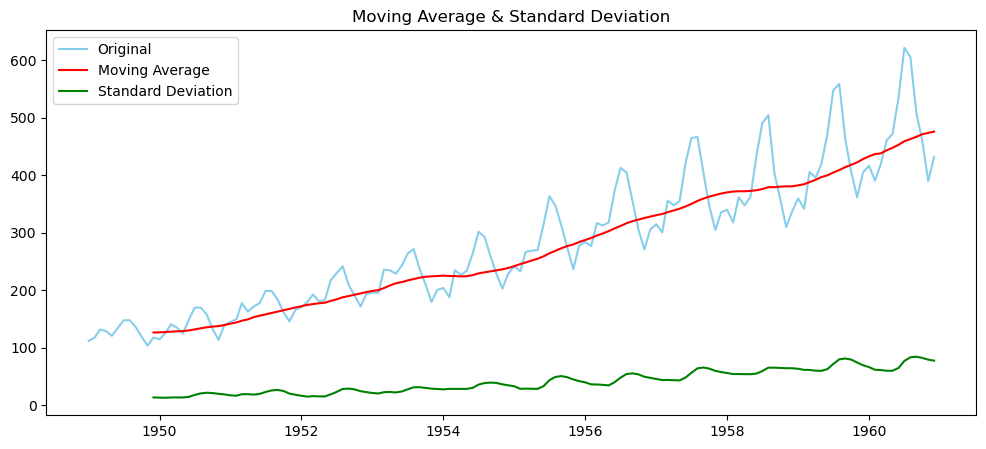

In [20]:
actual = plt.plot(airpassengers, color='skyblue', label='Original')
mean = plt.plot(moving_avg, color='red', label='Moving Average')
std = plt.plot(moving_std, color='green', label='Standard Deviation')
plt.legend(loc='best')
plt.title('Moving Average & Standard Deviation')
plt.show()

In [24]:
print('Results of Dickey-Fuller Test')
print('-----------------------------')
print('')
print('H0: Data is not stationary')
print('H1: Data is stationary')
print('')

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(airpassengers['AirPassengers'],autolag="AIC")

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'No. of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test
-----------------------------

H0: Data is not stationary
H1: Data is stationary

Test Statistic                0.815369
p-value                       0.991880
Lags Used                    13.000000
No. of Observations Used    130.000000
Critical Value (1%)          -3.481682
Critical Value (5%)          -2.884042
Critical Value (10%)         -2.578770
dtype: float64


In [27]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    print('Stationary Check')
    print('----------------')
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='skyblue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Average')
    std = plt.plot(movingSTD, color='green', label='Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Moving Average & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test
    print('')
    print('Results of Dickey-Fuller Test')
    print('-----------------------------')
    print('')
    print('H0: Data is not stationary')
    print('H1: Data is stationary')
    print('')
    from statsmodels.tsa.stattools import adfuller
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'No. of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

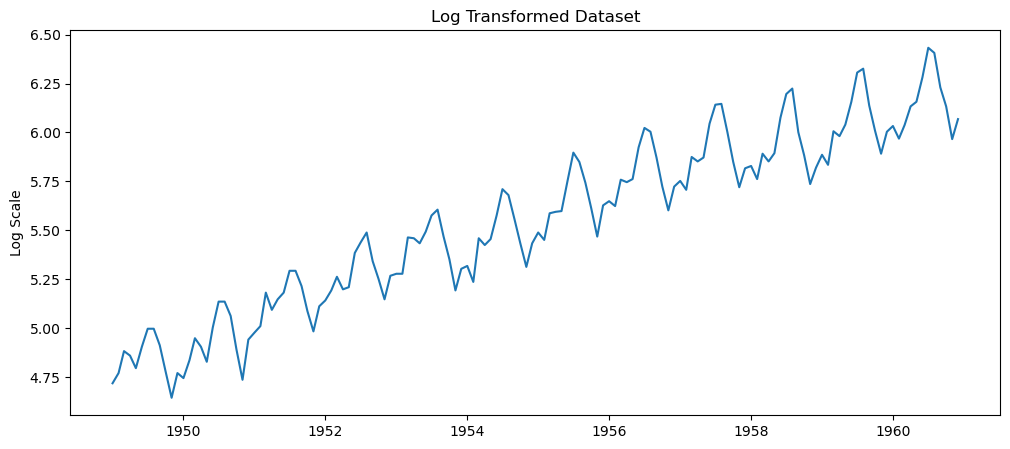

Stationary Check
----------------


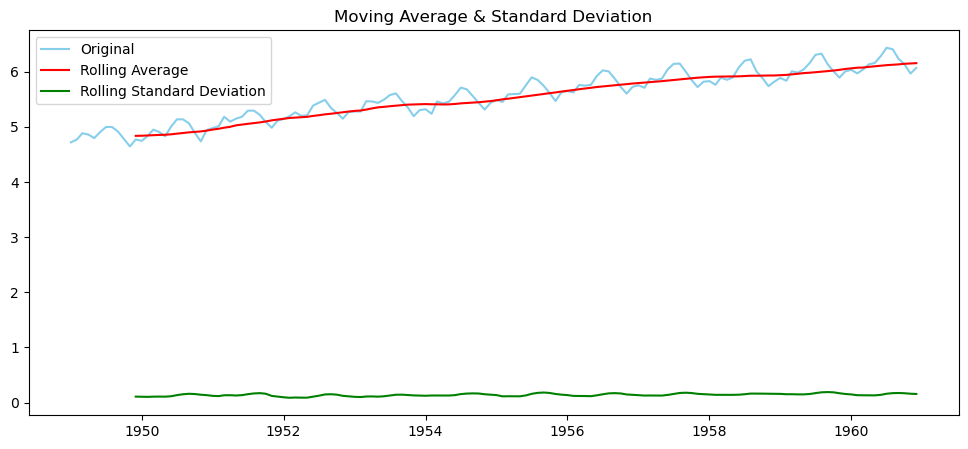


Results of Dickey-Fuller Test
-----------------------------

H0: Data is not stationary
H1: Data is stationary

Test Statistic               -1.717017
p-value                       0.422367
Lags Used                    13.000000
No. of Observations Used    130.000000
Critical Value (1%)          -3.481682
Critical Value (5%)          -2.884042
Critical Value (10%)         -2.578770
dtype: float64


In [28]:
airpassengers_log = np.log(airpassengers)
plt.plot(airpassengers_log)
plt.title('Log Transformed Dataset')
plt.ylabel('Log Scale')
plt.show()

#Stationarity test
test_stationarity(airpassengers_log)

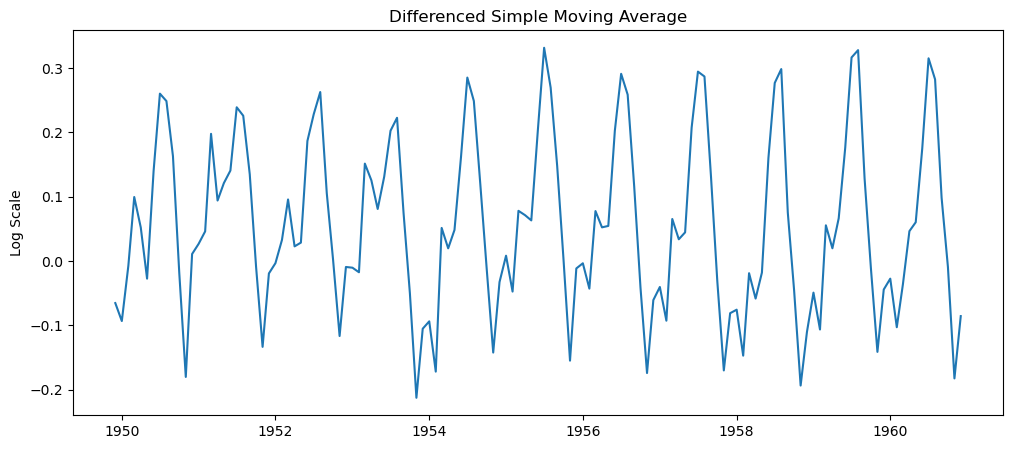

Stationary Check
----------------


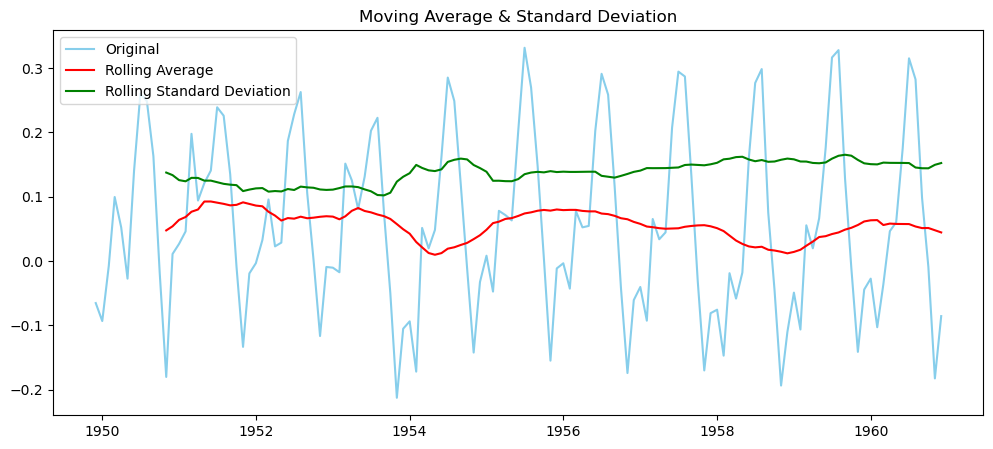


Results of Dickey-Fuller Test
-----------------------------

H0: Data is not stationary
H1: Data is stationary

Test Statistic               -3.162908
p-value                       0.022235
Lags Used                    13.000000
No. of Observations Used    119.000000
Critical Value (1%)          -3.486535
Critical Value (5%)          -2.886151
Critical Value (10%)         -2.579896
dtype: float64


In [30]:
#Finding moving average of the log transformed dataset and subtraciting it from the log transformed values
airpassengers_log_ma = airpassengers_log.rolling(12).mean()
airpassengers_log_diff = airpassengers_log - airpassengers_log_ma

#Removing NaN
airpassengers_log_diff.dropna(inplace=True)

#Plot
print('')
plt.plot(airpassengers_log_diff)
plt.title('Differenced Simple Moving Average')
plt.ylabel('Log Scale')
plt.show()

test_stationarity(airpassengers_log_diff)


Exponential Moving Average
--------------------------

            AirPassengers
time                     
1949-01-01       4.718499
1949-02-01       4.745345
1949-03-01       4.793835
1949-04-01       4.811785
1949-05-01       4.808206
...                   ...
1960-08-01       6.046445
1960-09-01       6.056778
1960-10-01       6.061079
1960-11-01       6.055750
1960-12-01       6.056461

[144 rows x 1 columns]

Log transformed VS exponential moving average
---------------------------------------------


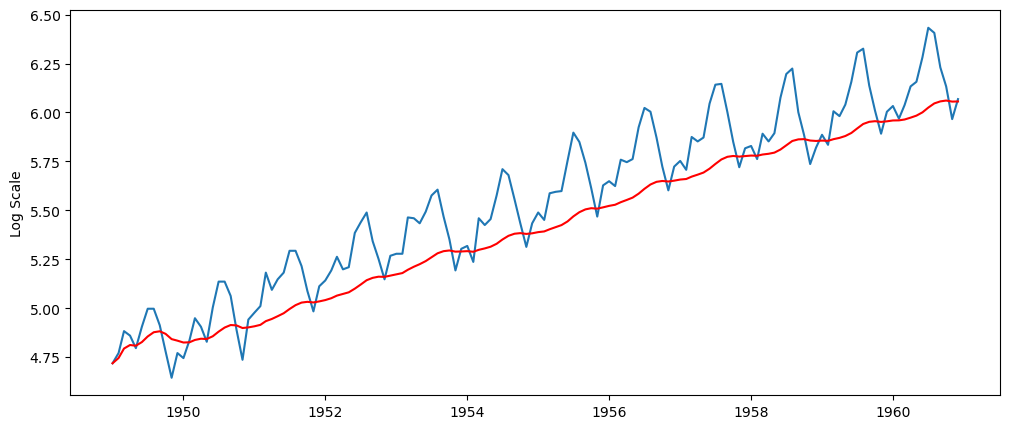


Differenced Exponential Moving Average
--------------------------------------

            AirPassengers
time                     
1949-01-01       0.000000
1949-02-01       0.025339
1949-03-01       0.088967
1949-04-01       0.048028
1949-05-01      -0.012415
...                   ...
1960-08-01       0.360435
1960-09-01       0.173704
1960-10-01       0.072319
1960-11-01      -0.089603
1960-12-01       0.011964

[144 rows x 1 columns]
Stationary Check
----------------


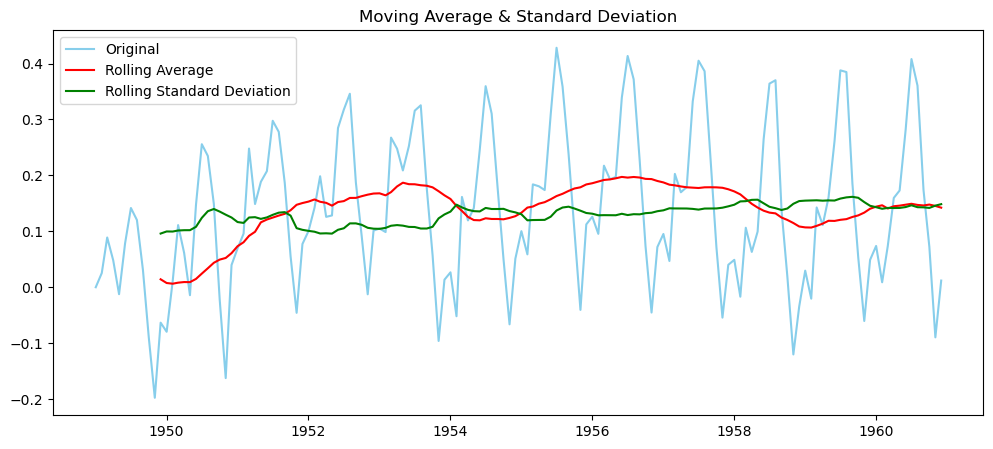


Results of Dickey-Fuller Test
-----------------------------

H0: Data is not stationary
H1: Data is stationary

Test Statistic               -3.601262
p-value                       0.005737
Lags Used                    13.000000
No. of Observations Used    130.000000
Critical Value (1%)          -3.481682
Critical Value (5%)          -2.884042
Critical Value (10%)         -2.578770
dtype: float64


In [31]:
#Finding exponential moving average of the log transformed data
airpassengers_log_ema = airpassengers_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
print('')
print('Exponential Moving Average')
print('--------------------------')
print('')
print(airpassengers_log_ema)

#Visualization
print('')
print('Log transformed VS exponential moving average')
print('---------------------------------------------')
plt.plot(airpassengers_log)
plt.plot(airpassengers_log_ema,color='red')
plt.ylabel('Log Scale')
plt.show()

#Subtracting ema from log transformed values
airpassengers_log_ema_diff = airpassengers_log - airpassengers_log_ema
print('')
print('Differenced Exponential Moving Average')
print('--------------------------------------')
print('')
print(airpassengers_log_ema_diff)

test_stationarity(airpassengers_log_ema_diff)



Shifted log values
------------------

            AirPassengers
time                     
1949-02-01       0.052186
1949-03-01       0.112117
1949-04-01      -0.022990
1949-05-01      -0.064022
1949-06-01       0.109484
...                   ...
1960-08-01      -0.026060
1960-09-01      -0.176399
1960-10-01      -0.097083
1960-11-01      -0.167251
1960-12-01       0.102279

[143 rows x 1 columns]

Log transformed VS log transformed shifted data
-----------------------------------------------


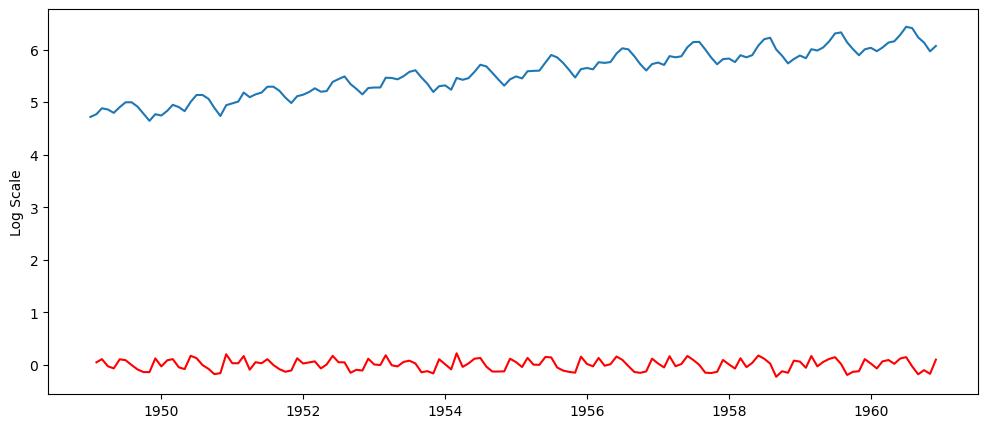

Stationary Check
----------------


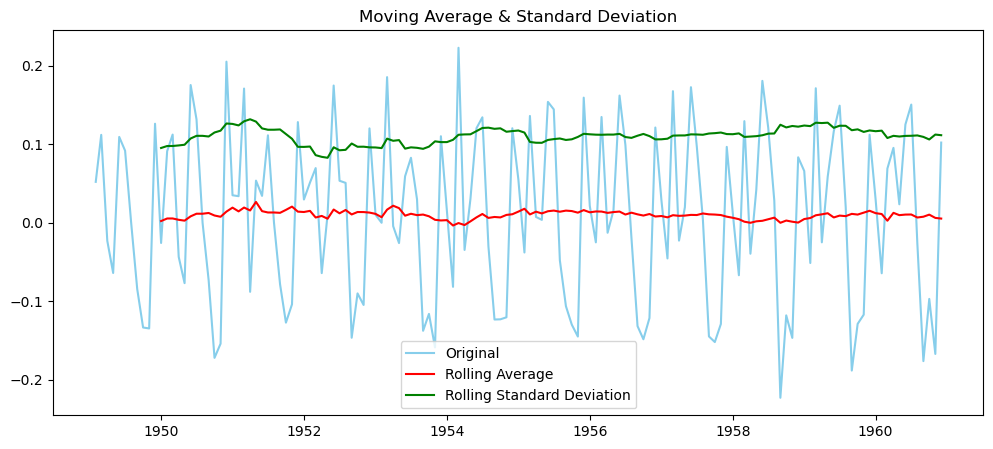


Results of Dickey-Fuller Test
-----------------------------

H0: Data is not stationary
H1: Data is stationary

Test Statistic               -2.717131
p-value                       0.071121
Lags Used                    14.000000
No. of Observations Used    128.000000
Critical Value (1%)          -3.482501
Critical Value (5%)          -2.884398
Critical Value (10%)         -2.578960
dtype: float64


In [33]:
#Differencing previous values
#Subtraction present log scale values from its previous values
airpassengers_log_shift = airpassengers_log - airpassengers_log.shift()
airpassengers_log_shift.dropna(inplace=True)
print('')
print('Shifted log values')
print('------------------')
print('')
print(airpassengers_log_shift)

#visualizing
print('')
print('Log transformed VS log transformed shifted data')
print('-----------------------------------------------')
plt.plot(airpassengers_log)
plt.plot(airpassengers_log_shift,color='red')
plt.ylabel('Log Scale')
plt.show()

test_stationarity(airpassengers_log_shift)


Shifted log values
------------------

            AirPassengers
time                     
1949-02-01       0.052186
1949-03-01       0.112117
1949-04-01      -0.022990
1949-05-01      -0.064022
1949-06-01       0.109484
...                   ...
1960-08-01      -0.026060
1960-09-01      -0.176399
1960-10-01      -0.097083
1960-11-01      -0.167251
1960-12-01       0.102279

[143 rows x 1 columns]

Log transformed VS log transformed shifted data
-----------------------------------------------


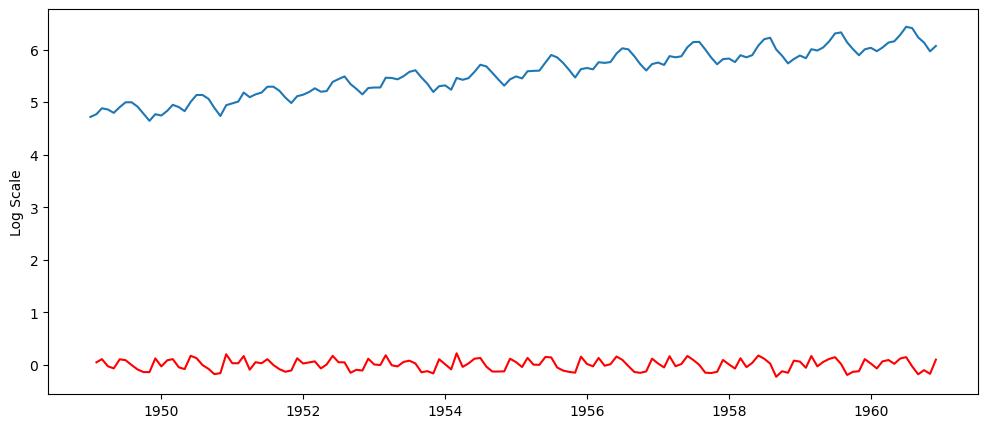

Stationary Check
----------------


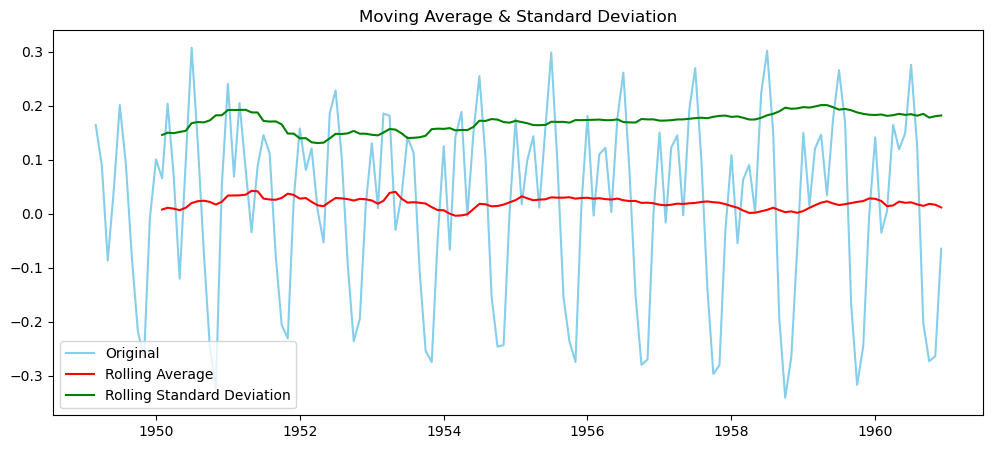


Results of Dickey-Fuller Test
-----------------------------

H0: Data is not stationary
H1: Data is stationary

Test Statistic               -3.167907
p-value                       0.021919
Lags Used                    11.000000
No. of Observations Used    130.000000
Critical Value (1%)          -3.481682
Critical Value (5%)          -2.884042
Critical Value (10%)         -2.578770
dtype: float64


In [34]:
#Differencing previous values
#Subtraction present log scale values from its previous values
airpassengers_log_shift2 = airpassengers_log - airpassengers_log.shift(2)
airpassengers_log_shift2.dropna(inplace=True)
print('')
print('Shifted log values')
print('------------------')
print('')
print(airpassengers_log_shift)

#visualizing
print('')
print('Log transformed VS log transformed shifted data')
print('-----------------------------------------------')
plt.plot(airpassengers_log)
plt.plot(airpassengers_log_shift,color='red')
plt.ylabel('Log Scale')
plt.show()

test_stationarity(airpassengers_log_shift2)


Decomposed Time Series Data
---------------------------



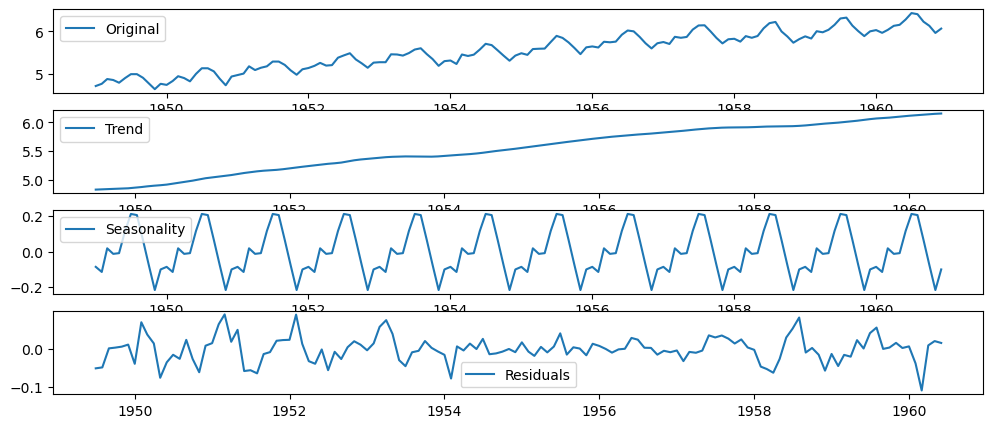

In [40]:
#Decomposing time series components
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(airpassengers_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

print('')
print('Decomposed Time Series Data')
print('---------------------------')
print('')

plt.subplot(411)
plt.plot(airpassengers_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')

Stationary Check
----------------


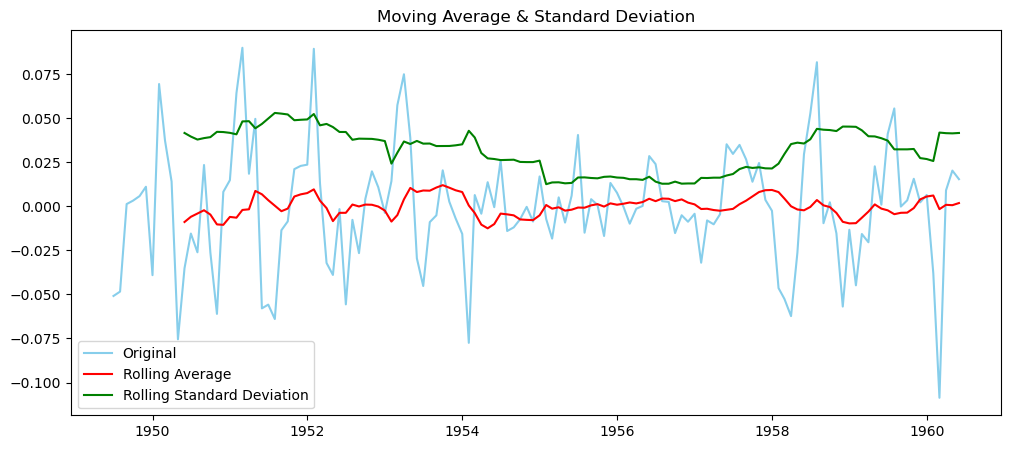


Results of Dickey-Fuller Test
-----------------------------

H0: Data is not stationary
H1: Data is stationary

Test Statistic             -6.332387e+00
p-value                     2.885059e-08
Lags Used                   9.000000e+00
No. of Observations Used    1.220000e+02
Critical Value (1%)        -3.485122e+00
Critical Value (5%)        -2.885538e+00
Critical Value (10%)       -2.579569e+00
dtype: float64


In [41]:
airpassengers_log_decomposed = residuals
airpassengers_log_decomposed.dropna(inplace=True)

airpassengers_log_decomposed
test_stationarity(airpassengers_log_decomposed)

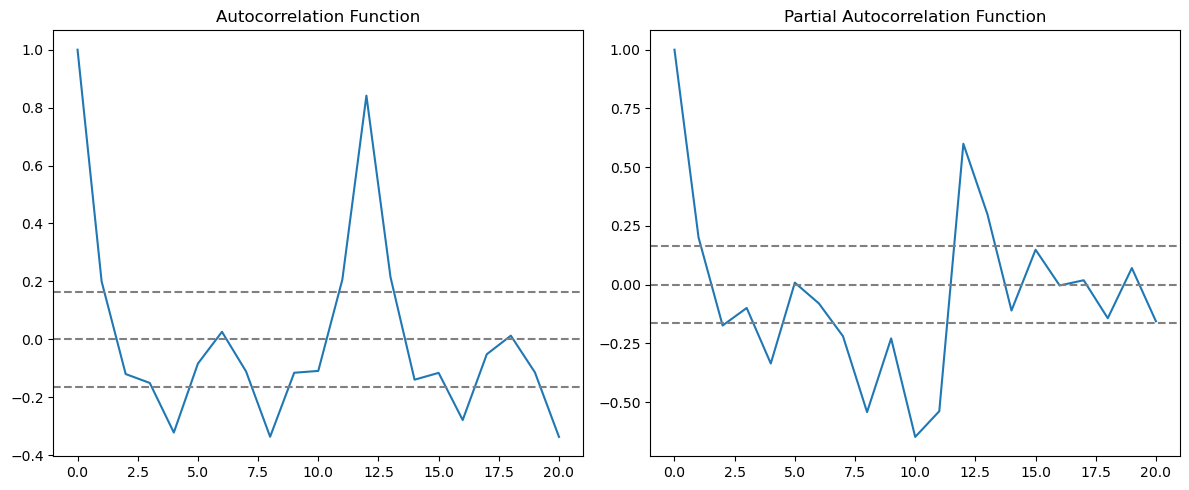

In [46]:
#Determining AR and MA lags 
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(airpassengers_log_shift, nlags = 20)
lag_pacf = pacf(airpassengers_log_shift, nlags = 20, method='ols')

#ACF plot
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(airpassengers_log_shift)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(airpassengers_log_shift)),linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#PACF plot
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(airpassengers_log_shift)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(airpassengers_log_shift)),linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [47]:
#Determining order of ARMA model
from statsmodels.tsa.stattools import arma_order_select_ic
print(arma_order_select_ic(airpassengers_log_shift))
print(arma_order_select_ic(airpassengers_log_shift2))

C:\Users\Jan Tinio\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jan Tinio\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jan Tinio\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jan Tinio\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jan Tinio\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Conver

{'bic':             0           1           2
0 -225.639205 -228.618780 -228.527574
1 -226.497365 -229.756335 -250.369957
2 -225.753249 -255.335848 -245.452081
3 -222.137559 -252.192864 -249.072531
4 -232.957921 -228.013485 -251.536031, 'bic_min_order': (2, 1)}


C:\Users\Jan Tinio\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jan Tinio\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jan Tinio\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jan Tinio\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jan Tinio\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Conver

{'bic':             0           1           2
0  -99.111015 -213.631597 -216.385071
1 -142.119926 -214.328000 -222.283422
2 -179.249804 -213.512145 -243.064394
3 -174.532037 -209.919015 -240.048846
4 -187.178239 -220.726080 -241.432713, 'bic_min_order': (2, 2)}


In [53]:
#AR
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(airpassengers,order=(2,1,0))
results_AR = model.fit(disp=-1)

plt.plot(airpassengers)
plt.plot(results_AR.fittedvalues, color='red')

print()
print('AR Model Summary and Plot')
print('-------------------------')
print(results_AR.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
